## Practice: Basic Artificial Neural Networks
Credits: this notebook belongs to [Practical DL](https://docs.google.com/forms/d/e/1FAIpQLScvrVtuwrHSlxWqHnLt1V-_7h2eON_mlRR6MUb3xEe5x9LuoA/viewform?usp=sf_link) course by Yandex School of Data Analysis.

We will start working with neural networks on the practice session. Your homework will be to finish the implementation of the layers.

Our goal is simple, yet an actual implementation may take some time :). We are going to write an Artificial Neural Network (almost) from scratch. The software design was heavily inspired by [PyTorch](http://pytorch.org) which is the main framework of our course 

Speaking about the homework (once again, it will be really similar to this seminar), it requires sending **multiple** files, please do not forget to include all the files when sending to TA. The list of files:
- This notebook
- modules.ipynb with all blocks implemented (except maybe `Conv2d` and `MaxPool2d` layers implementation which are part of 'advanced' version of this homework)

In [1]:
%matplotlib inline
from time import time, sleep
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

# Framework

Implement everything in `modules.ipynb`. Read all the comments thoughtfully to ease the pain. Please try not to change the prototypes.

Do not forget, that each module should return **AND** store `output` and `gradInput`.

The typical assumption is that `module.backward` is always executed after `module.forward`,
so `output` is stored, this would be useful for `SoftMax`. 

### Tech note
Prefer using `np.multiply`, `np.add`, `np.divide`, `np.subtract` instead of `*`,`+`,`/`,`-` for better memory handling.

Example: suppose you allocated a variable 

```
a = np.zeros(...)
```
So, instead of
```
a = b + c  # will be reallocated, GC needed to free
``` 
You can use: 
```
np.add(b,c,out = a) # puts result in `a`
```

In [2]:
# (re-)load layers
%run modules.ipynb

# Toy example

Use this example to debug your code, start with logistic regression and then test other layers. You do not need to change anything here. This code is provided for you to test the layers. Also it is easy to use this code in MNIST task.

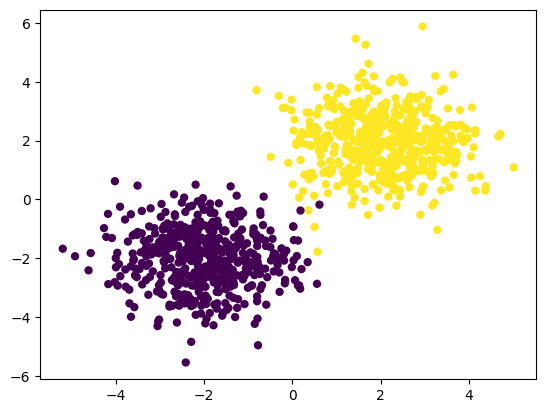

In [3]:
# Generate some data
N = 500

X1 = np.random.randn(N,2) + np.array([2,2])
X2 = np.random.randn(N,2) + np.array([-2,-2])

Y = np.concatenate([np.ones(N),np.zeros(N)])[:,None]
Y = np.hstack([Y, 1-Y])

X = np.vstack([X1,X2])
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')

Define a **logistic regression** for debugging. 

In [44]:
net = Sequential()
net.add(Linear(2, 2))
net.add(LogSoftMax())

criterion = ClassNLLCriterion()

print(net)

# Test something like that then 

# net = Sequential()
# net.add(Linear(2, 4))
# net.add(ReLU())
# net.add(Linear(4, 2))
# net.add(LogSoftMax())

Linear 2 -> 2
LogSoftMax



Start with batch_size = 1000 to make sure every step lowers the loss, then try stochastic version.

In [43]:
# Optimizer params
optimizer_config = {'learning_rate' : 1e-1, 'momentum': 0.9}
optimizer_state = {}

# Looping params
n_epoch = 20
batch_size = 128

In [6]:
# batch generator
def get_batches(dataset, batch_size):
    X, Y = dataset
    n_samples = X.shape[0]
        
    # Shuffle at the start of epoch
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for start in range(0, n_samples, batch_size):
        end = min(start + batch_size, n_samples)
        
        batch_idx = indices[start:end]
    
        yield X[batch_idx], Y[batch_idx]

### Train

Basic training loop. Examine it.

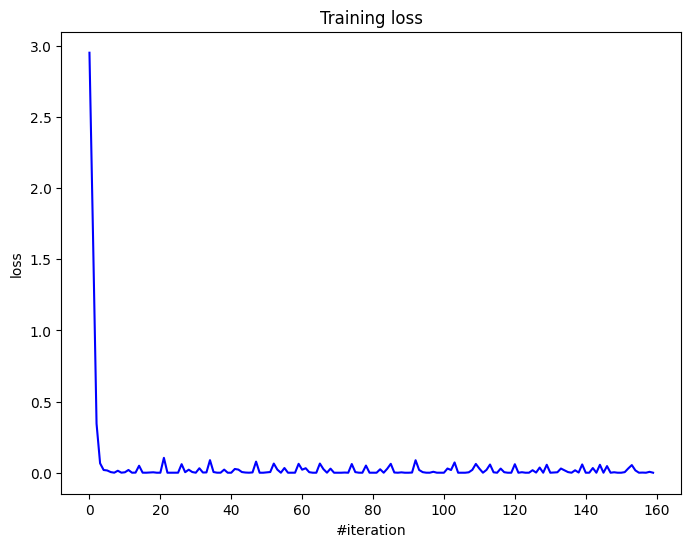

Current loss: 0.000051


In [7]:
loss_history = []

for i in range(n_epoch):
    for x_batch, y_batch in get_batches((X, Y), batch_size):
        
        net.zeroGradParameters()
        
        # Forward
        predictions = net.forward(x_batch)
        loss = criterion.forward(predictions, y_batch)
    
        # Backward
        dp = criterion.backward(predictions, y_batch)
        net.backward(x_batch, dp)
        
        # Update weights
        sgd_momentum(net.getParameters(), 
                     net.getGradParameters(), 
                     optimizer_config,
                     optimizer_state)      
        
        loss_history.append(loss)

    # Visualize
    display.clear_output(wait=True)
    plt.figure(figsize=(8, 6))
        
    plt.title("Training loss")
    plt.xlabel("#iteration")
    plt.ylabel("loss")
    plt.plot(loss_history, 'b')
    plt.show()
    
    print('Current loss: %f' % loss)    

# Digit classification 

We are using old good [MNIST](http://yann.lecun.com/exdb/mnist/) as our dataset. It can be downloaded with the following file.

In [8]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23f_basic/homeworks/hw08_nn_from_scratch/mnist.py -nc

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [9]:
# import mnist
# X_train, y_train, X_val, y_val, X_test, y_test = mnist.load_dataset()
from datasets import load_dataset
dataset = load_dataset("mnist")
dataset.set_format('torch')
X_train, y_train = dataset['train']['image'], dataset['train']['label']
X_test, y_test = dataset['test']['image'], dataset['test']['label']


C:\Users\Warain\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


One-hot encode the labels first.

In [10]:
# Your code goes here. ################################################
y_train_one_hot = np.eye(10)[y_train.numpy()]
y_test_one_hot = np.eye(10)[y_test.numpy()]

- **Compare** `ReLU`, `ELU`, `LeakyReLU`, `SoftPlus` activation functions. 
You would better pick the best optimizer params for each of them, but it is overkill for now. Use an architecture of your choice for the comparison.
- **Try** inserting `BatchNormalization` (folowed by `ChannelwiseScaling`) between `Linear` module and activation functions.
- Plot the losses both from activation functions comparison and `BatchNormalization` comparison on one plot. Please find a scale (log?) when the lines are distinguishable, do not forget about naming the axes, the plot should be goodlooking.
- Plot the losses for two networks: one trained by momentum_sgd, another one trained by Adam. Which one performs better?
- Hint: good logloss for MNIST should be around 0.5. 

ReLU_False_sgd_momentum


Epochs: 100%|██████████| 10/10 [00:14<00:00,  1.47s/it]


ReLU_False_adam_optimizer


Epochs: 100%|██████████| 10/10 [00:14<00:00,  1.46s/it]


ReLU_True_sgd_momentum


Epochs: 100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


ReLU_True_adam_optimizer


Epochs: 100%|██████████| 10/10 [00:14<00:00,  1.48s/it]


ELU_False_sgd_momentum


Epochs: 100%|██████████| 10/10 [00:15<00:00,  1.52s/it]


ELU_False_adam_optimizer


Epochs: 100%|██████████| 10/10 [00:15<00:00,  1.55s/it]


ELU_True_sgd_momentum


Epochs: 100%|██████████| 10/10 [00:15<00:00,  1.53s/it]


ELU_True_adam_optimizer


Epochs: 100%|██████████| 10/10 [00:15<00:00,  1.55s/it]


LeakyReLU_False_sgd_momentum


Epochs: 100%|██████████| 10/10 [00:14<00:00,  1.45s/it]


LeakyReLU_False_adam_optimizer


Epochs: 100%|██████████| 10/10 [00:17<00:00,  1.73s/it]


LeakyReLU_True_sgd_momentum


Epochs: 100%|██████████| 10/10 [00:20<00:00,  2.06s/it]


LeakyReLU_True_adam_optimizer


Epochs: 100%|██████████| 10/10 [00:14<00:00,  1.41s/it]


SoftPlus_False_sgd_momentum


Epochs: 100%|██████████| 10/10 [00:13<00:00,  1.35s/it]


SoftPlus_False_adam_optimizer


Epochs: 100%|██████████| 10/10 [00:13<00:00,  1.39s/it]


SoftPlus_True_sgd_momentum


Epochs: 100%|██████████| 10/10 [00:14<00:00,  1.46s/it]


SoftPlus_True_adam_optimizer


Epochs: 100%|██████████| 10/10 [00:14<00:00,  1.44s/it]


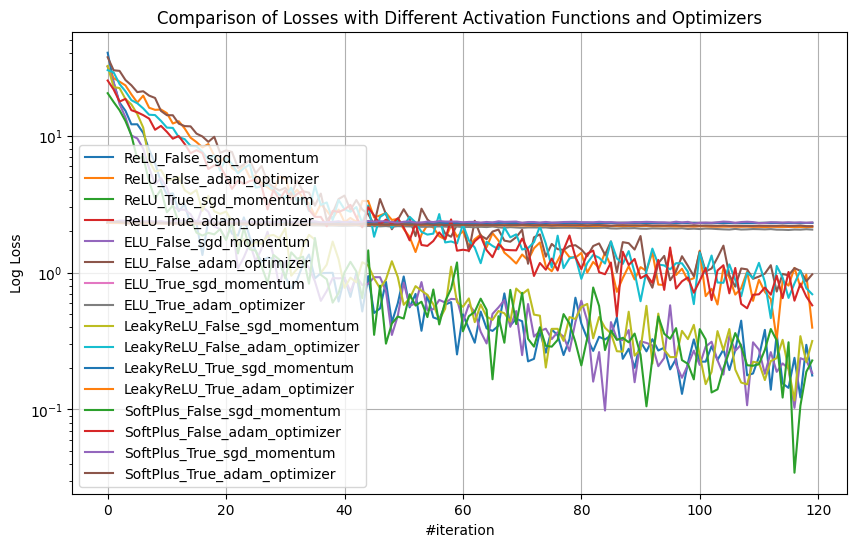

In [11]:
# Your code goes here. ################################################
from tqdm import tqdm

def create_model(activation_function, batch_norm=False):
    model = Sequential()
    model.add(Flatten())
    model.add(Linear(28 * 28, 128))
    
    if batch_norm:
        model.add(BatchNormalization())
        model.add(ChannelwiseScaling(128))
    
    model.add(activation_function)

    model.add(Linear(128, 10))

    model.add(LogSoftMax())

    return model


def train_loop(model, optimizer, X, Y, batch_size, n_epoch, criterion, optimizer_config, optimizer_state):

    loss_history = []
    model.train()

    for i in tqdm(range(n_epoch), desc="Epochs"):
        batches = get_batches((X, Y), batch_size)
        batch_iter = tqdm(batches, desc=f"Epoch {i+1}/{n_epoch}", leave=False)
        
        for x_batch, y_batch in batch_iter:
            model.zeroGradParameters()
            
            # Forward
            predictions = model.forward(x_batch)
            loss = criterion.forward(predictions, y_batch)
        
            # Backward
            dp = criterion.backward(predictions, y_batch)
            model.backward(x_batch, dp)
            
            # Update weights
            optimizer(model.getParameters(), 
                        model.getGradParameters(), 
                        optimizer_config,
                        optimizer_state)
            loss_history.append(loss)
            
    return loss_history

activations = [ReLU(), ELU(), LeakyReLU(), SoftPlus()]
optimizers = [sgd_momentum, adam_optimizer]
batch_norm_options = [False, True]
optimizer_config = {
    'learning_rate': 0.0001,
    'beta1': 0.9,
    'beta2': 0.999,
    'epsilon': 1e-9,
    'momentum': 0.9
}
n_epoch = 10
batch_size = 256

loss_history = {}

for activation_function in activations:
    for batch_norm in batch_norm_options:
        for optimizer in optimizers:
            model = create_model(activation_function, batch_norm)
            optimizer_state = {}
            key = f'{activation_function.__class__.__name__}_{batch_norm}_{optimizer.__name__}'
            print(key)
            losses = train_loop(model, optimizer, X_train.numpy()[:3000], y_train_one_hot, batch_size, n_epoch, criterion, optimizer_config, optimizer_state)

            loss_history[key] = losses

plt.figure(figsize=(10, 6))

for key, losses in loss_history.items():
    plt.plot(losses, label=key)

plt.title("Comparison of Losses with Different Activation Functions and Optimizers")
plt.xlabel("#iteration")
plt.ylabel("Log Loss")
plt.yscale('log')
plt.legend(loc='best')
plt.grid(True)
plt.show()




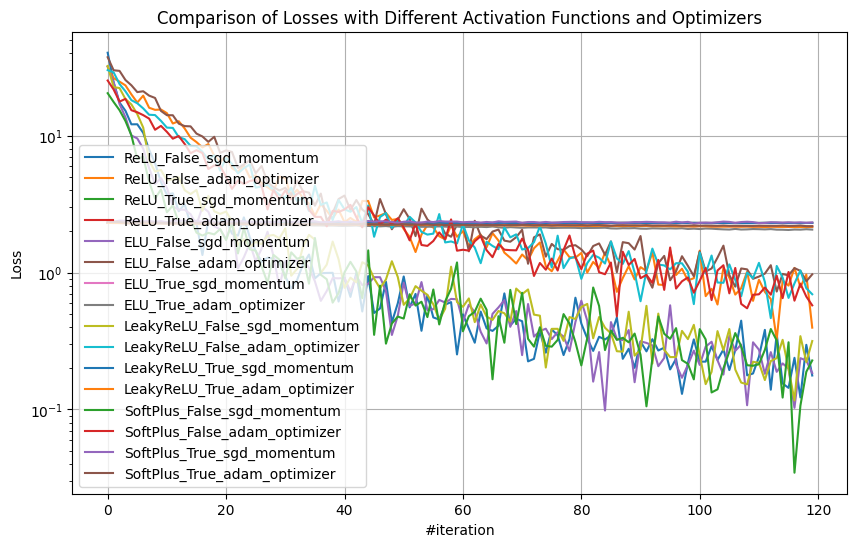

In [12]:
plt.figure(figsize=(10, 6))

for key, losses in loss_history.items():
    plt.plot(losses, label=key)

plt.title("Comparison of Losses with Different Activation Functions and Optimizers")
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.yscale('log')
plt.legend(loc='best')
plt.grid(True)
plt.show()

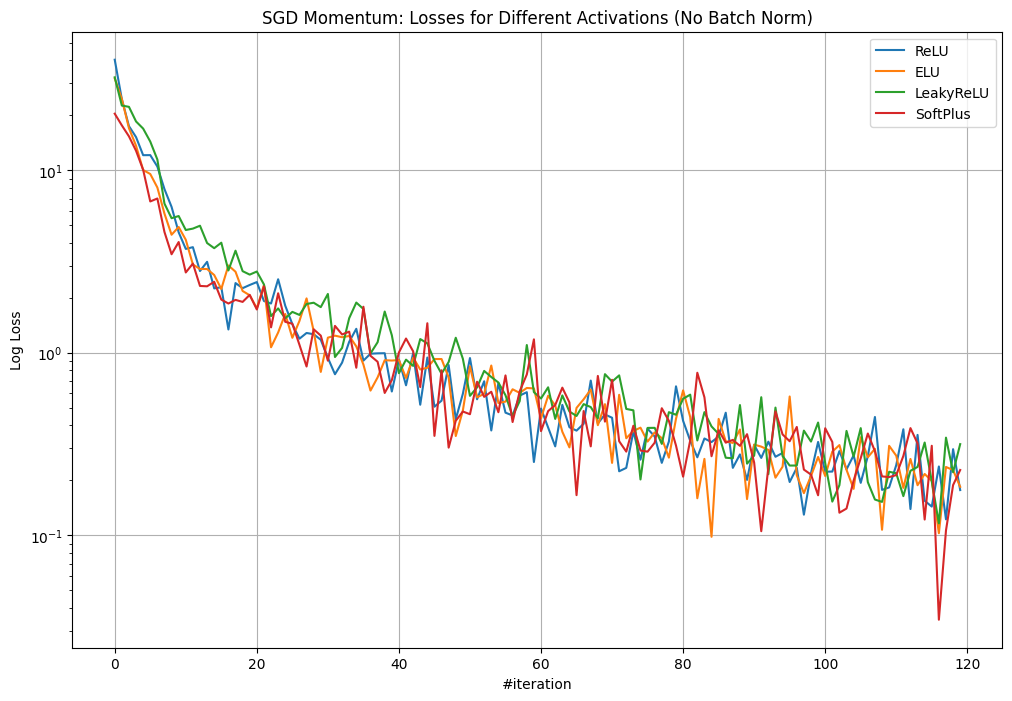

In [20]:
plt.figure(figsize=(12, 8))
for activation_function in activations:
    key = f'{activation_function.__class__.__name__}_False_sgd_momentum'
    plt.plot(loss_history[key], label=f'{activation_function.__class__.__name__}')
plt.title("SGD Momentum: Losses for Different Activations (No Batch Norm)")
plt.xlabel("#iteration")
plt.ylabel("Log Loss")
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

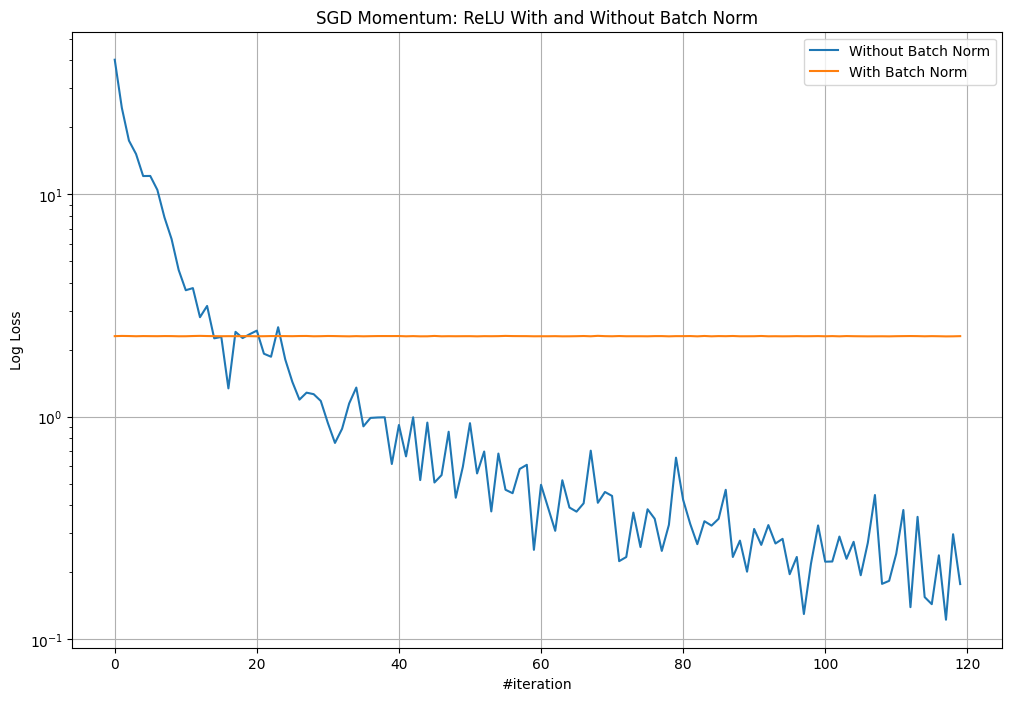

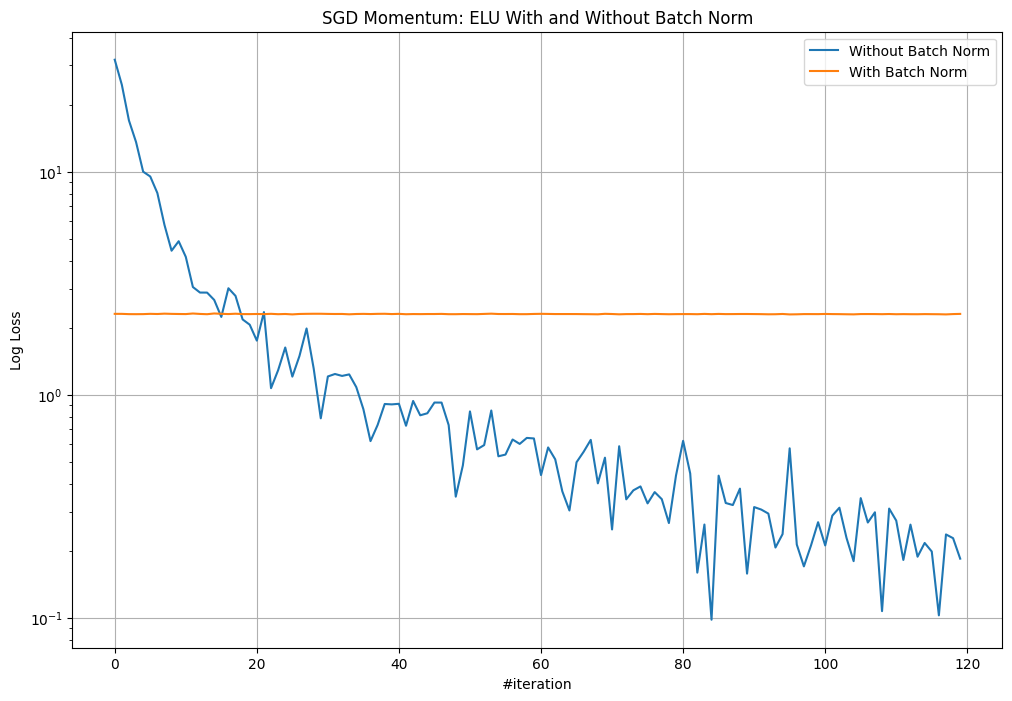

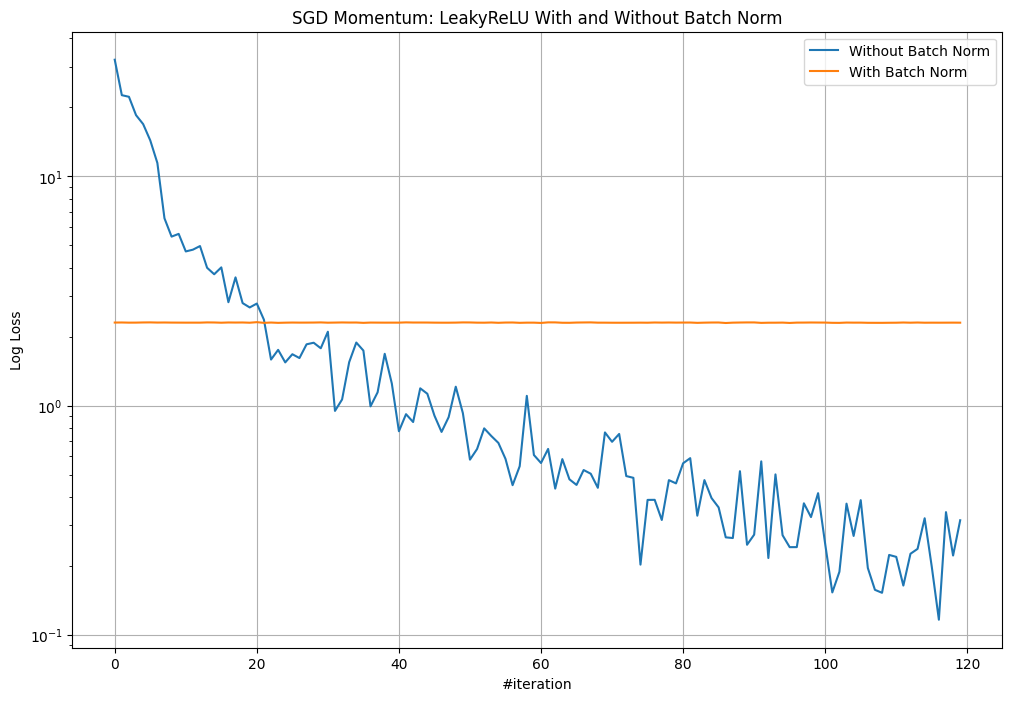

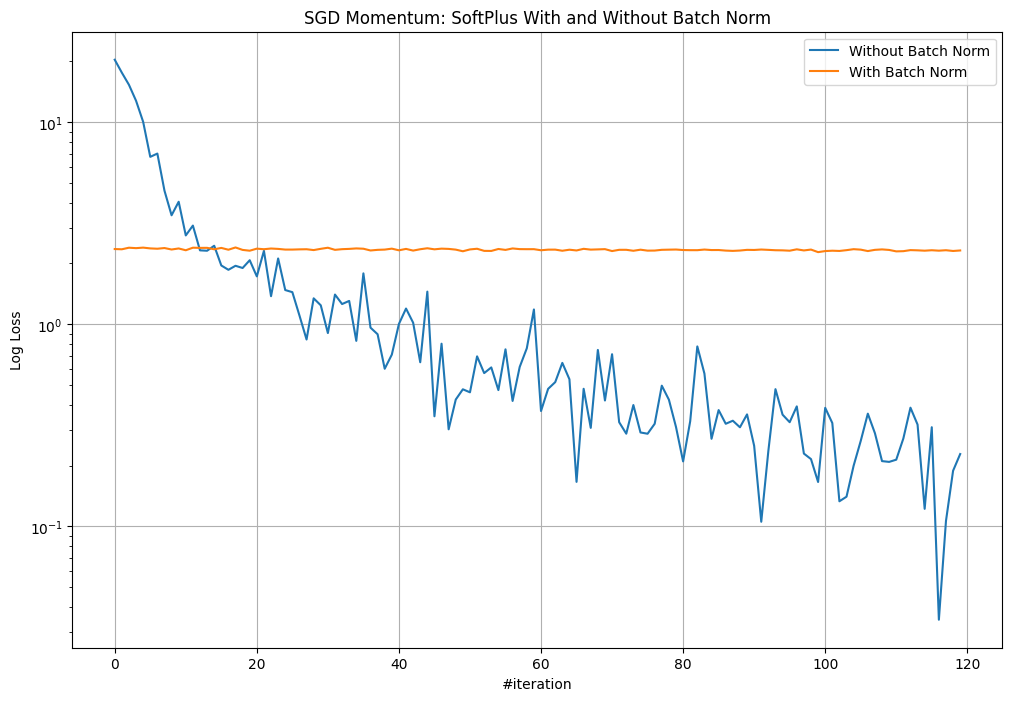

In [22]:
for activation_function in activations:
    plt.figure(figsize=(12, 8))
    for batch_norm in batch_norm_options:
        key = f'{activation_function.__class__.__name__}_{batch_norm}_sgd_momentum'
        label = f"{'With' if batch_norm else 'Without'} Batch Norm"
        plt.plot(loss_history[key], label=label)
    plt.title(f"SGD Momentum: {activation_function.__class__.__name__} With and Without Batch Norm")
    plt.xlabel("#iteration")
    plt.ylabel("Log Loss")
    plt.yscale('log')
    plt.legend()
    plt.grid()
    plt.show()

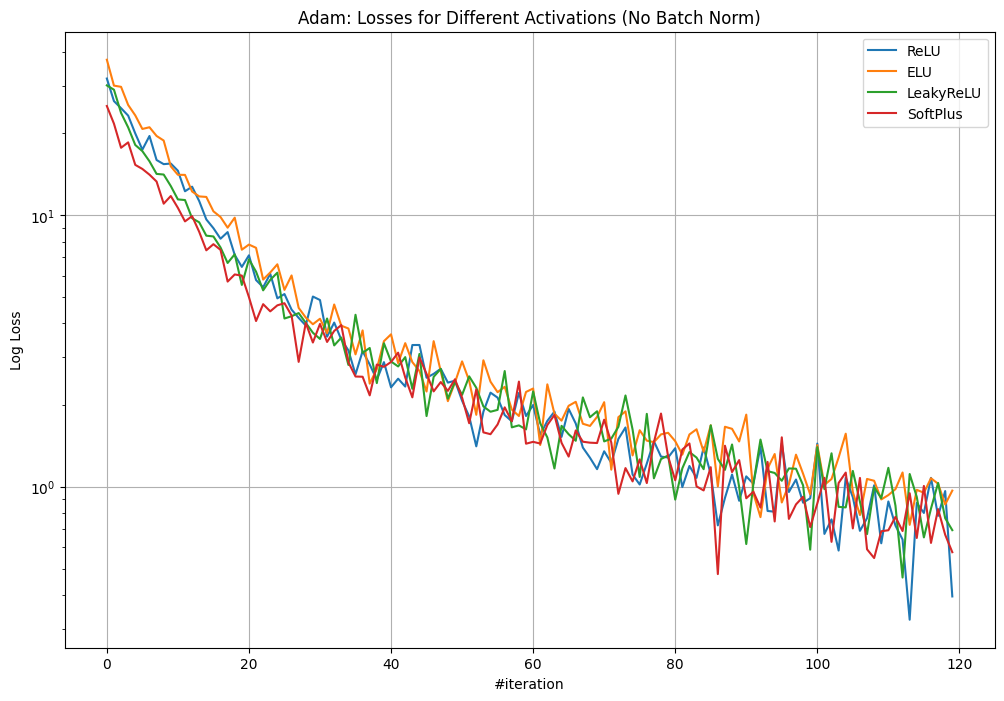

In [23]:
plt.figure(figsize=(12, 8))
for activation_function in activations:
    key = f'{activation_function.__class__.__name__}_False_adam_optimizer'
    plt.plot(loss_history[key], label=f'{activation_function.__class__.__name__}')
plt.title("Adam: Losses for Different Activations (No Batch Norm)")
plt.xlabel("#iteration")
plt.ylabel("Log Loss")
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

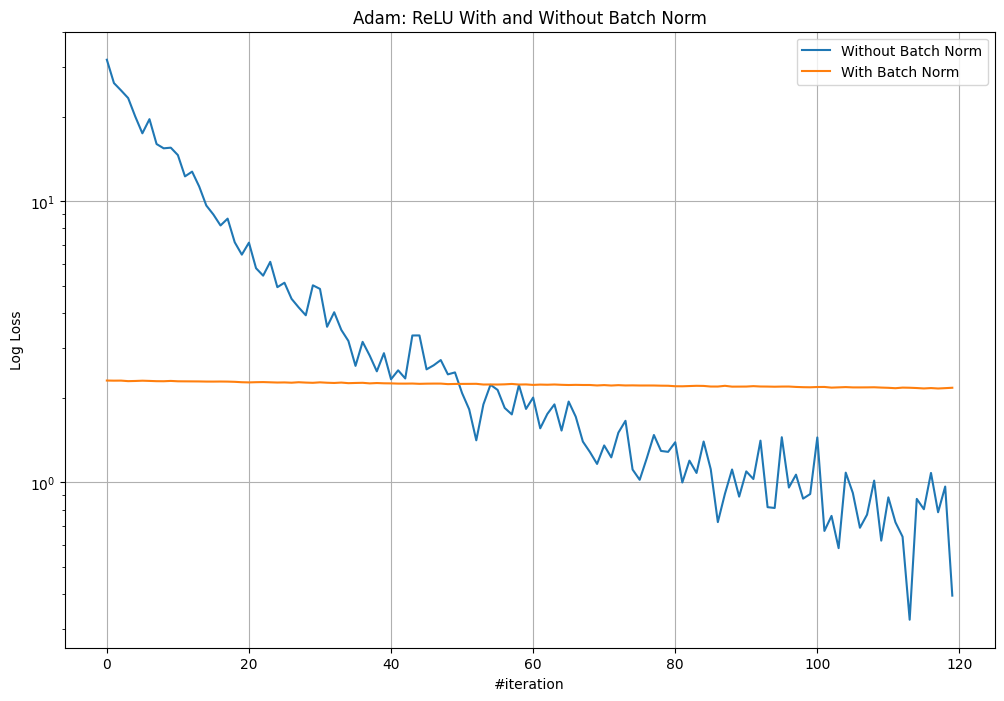

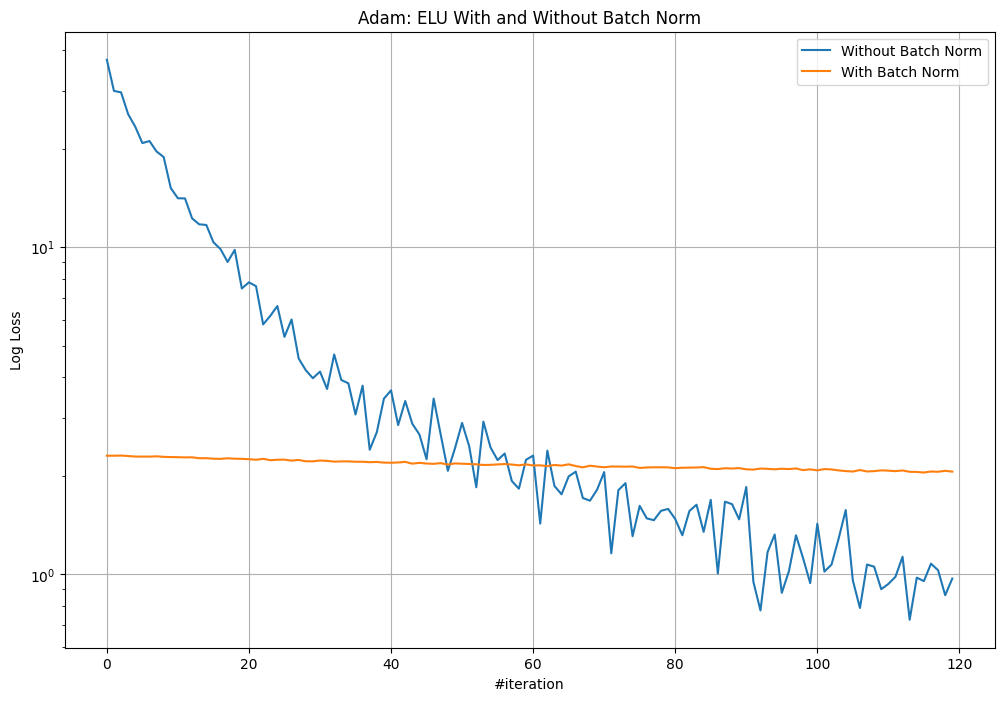

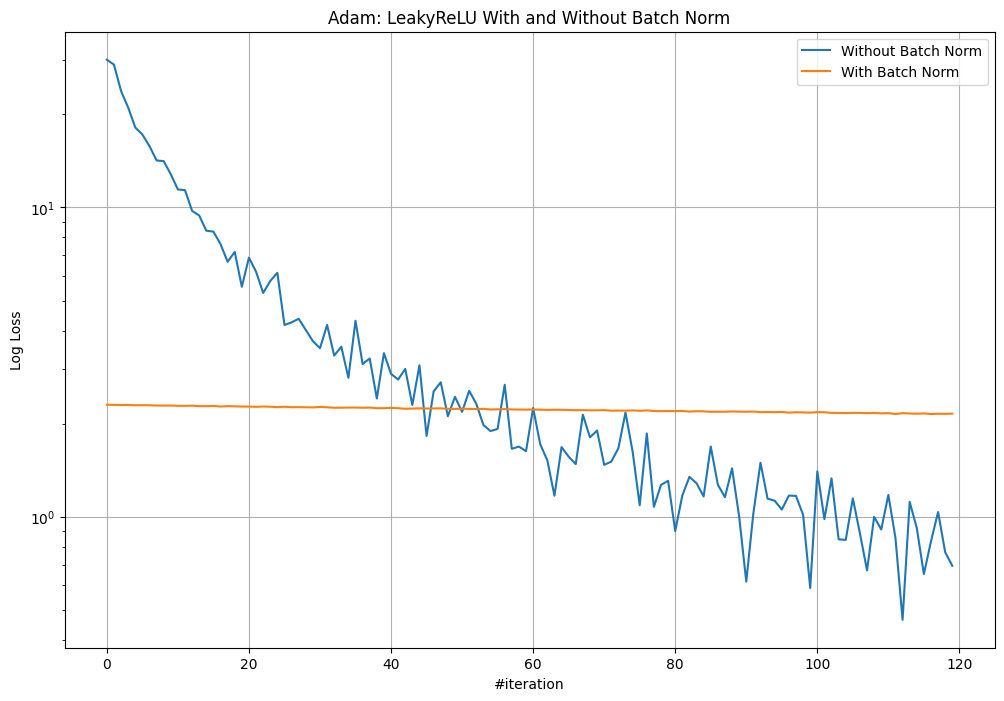

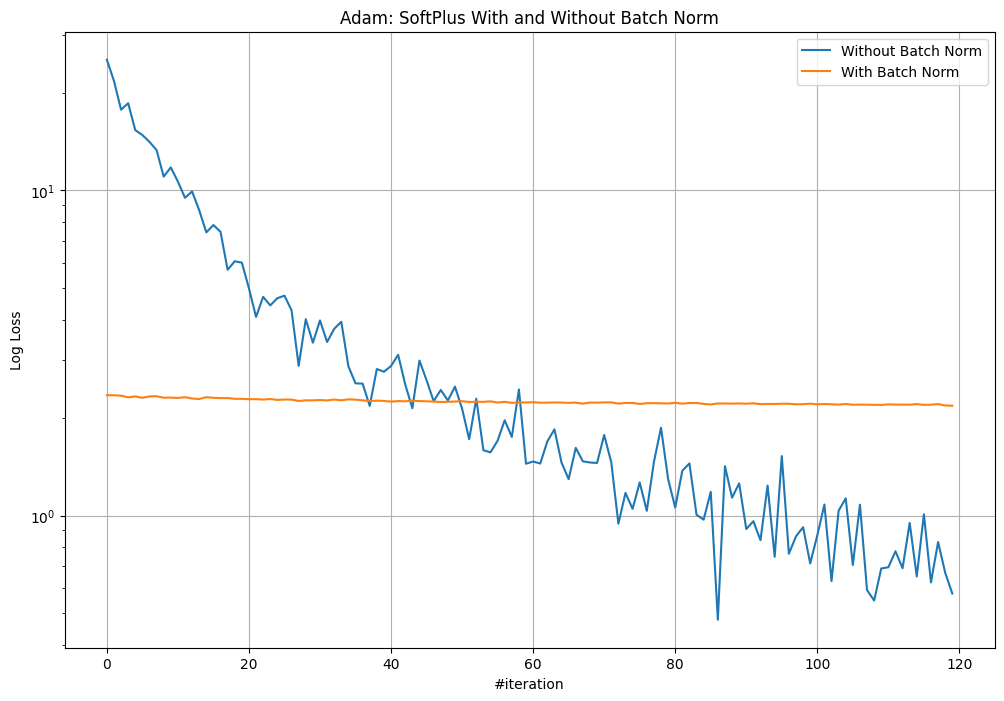

In [24]:
for activation_function in activations:
    plt.figure(figsize=(12, 8))
    for batch_norm in batch_norm_options:
        key = f'{activation_function.__class__.__name__}_{batch_norm}_adam_optimizer'
        label = f"{'With' if batch_norm else 'Without'} Batch Norm"
        plt.plot(loss_history[key], label=label)
    plt.title(f"Adam: {activation_function.__class__.__name__} With and Without Batch Norm")
    plt.xlabel("#iteration")
    plt.ylabel("Log Loss")
    plt.yscale('log')
    plt.legend()
    plt.grid()
    plt.show()

Write your personal opinion on the activation functions, think about computation times too. Does `BatchNormalization` help?

Функции потерь уменьшаются быстрее с оптимизатором sgd_momentum. ReLU и ELU обеспечивают наименьшее значение функции потерь с sgd_momentum. SoftPlus способен показывать неплохие результаты. ELU показывает более хорошие относительно других функций активации результаты с sgd_momentum, чем с adam_optimizer. С Batch Normalization функция потерь не уменьшается и имеет более высокие значения.

In [17]:
# Your answer goes here. ################################################

**Finally**, use all your knowledge to build a super cool model on this dataset. Use **dropout** to prevent overfitting, play with **learning rate decay**. You can use **data augmentation** such as rotations, translations to boost your score. Use your knowledge and imagination to train a model. Don't forget to call `training()` and `evaluate()` methods to set desired behaviour of `BatchNormalization` and `Dropout` layers.

In [55]:
# Your code goes here. ################################################
model = Sequential()
model.add(Flatten())
model.add(Linear(784, 128))
model.add(BatchNormalization())
model.add(ChannelwiseScaling(128))
model.add(Dropout(0.2))  
model.add(ReLU())
model.add(Linear(128, 64))
model.add(BatchNormalization())
model.add(ChannelwiseScaling(64))
model.add(Dropout(0.2))  
model.add(ReLU())
model.add(Linear(64, 10))
model.add(LogSoftMax())
model

Flatten
Linear 784 -> 128
BatchNormalization
ChannelwiseScaling
Dropout
ReLU
Linear 128 -> 64
BatchNormalization
ChannelwiseScaling
Dropout
ReLU
Linear 64 -> 10
LogSoftMax

Epochs: 100%|██████████| 20/20 [13:26<00:00, 40.30s/it]


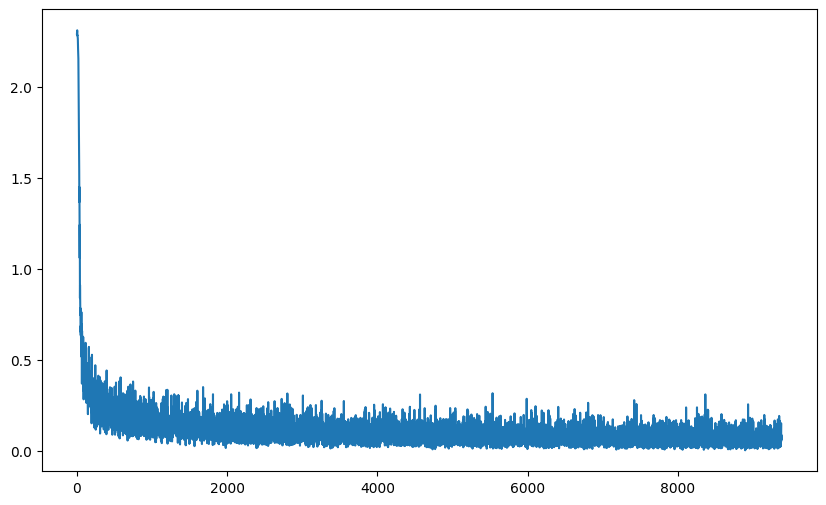

In [56]:
losses = train_loop(model, sgd_momentum, X_train.numpy(), y_train_one_hot, batch_size, n_epoch, ClassNLLCriterion(), optimizer_config, {})
plt.figure(figsize=(10, 6))
plt.plot(losses, label='Loss')

Print here your accuracy on test set. It should be around 90%.

In [57]:
# Your answer goes here. ################################################
model.evaluate()
out = model.forward(X_test)

y_pred_classes = np.argmax(out, axis=1)

accuracy = np.mean(y_pred_classes == y_test.numpy())

print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 97.37%


### Comparing with PyTorch implementation
The last (and maybe the easiest step after compared to the previous tasks: build a network with the same architecture as above now with PyTorch.

You can refer to the `week0_09` or `Lab3_part2` notebooks for hints.

__Good Luck!__

In [48]:
# Your beautiful code here.
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), y_train)
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), y_test)

trainloader = DataLoader(train_dataset, batch_size=128, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=128, shuffle=False)

model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 128),
    nn.BatchNorm1d(128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 64),
    nn.BatchNorm1d(64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 25
train_losses = []
test_accuracies = []

# Обучение модели
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    avg_train_loss = running_loss / len(trainloader)
    train_losses.append(avg_train_loss)
    
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_train_loss:.4f}")


C:\Users\Warain\AppData\Local\Temp\ipykernel_16472\2153069480.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), y_train)
C:\Users\Warain\AppData\Local\Temp\ipykernel_16472\2153069480.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), y_test)


Epoch 1/25, Loss: 0.4100
Epoch 2/25, Loss: 0.1637
Epoch 3/25, Loss: 0.1266
Epoch 4/25, Loss: 0.1106
Epoch 5/25, Loss: 0.0943
Epoch 6/25, Loss: 0.0868
Epoch 7/25, Loss: 0.0792
Epoch 8/25, Loss: 0.0726
Epoch 9/25, Loss: 0.0689
Epoch 10/25, Loss: 0.0647
Epoch 11/25, Loss: 0.0585
Epoch 12/25, Loss: 0.0584
Epoch 13/25, Loss: 0.0540
Epoch 14/25, Loss: 0.0518
Epoch 15/25, Loss: 0.0503
Epoch 16/25, Loss: 0.0480
Epoch 17/25, Loss: 0.0473
Epoch 18/25, Loss: 0.0435
Epoch 19/25, Loss: 0.0431
Epoch 20/25, Loss: 0.0432
Epoch 21/25, Loss: 0.0404
Epoch 22/25, Loss: 0.0401
Epoch 23/25, Loss: 0.0377
Epoch 24/25, Loss: 0.0389
Epoch 25/25, Loss: 0.0364


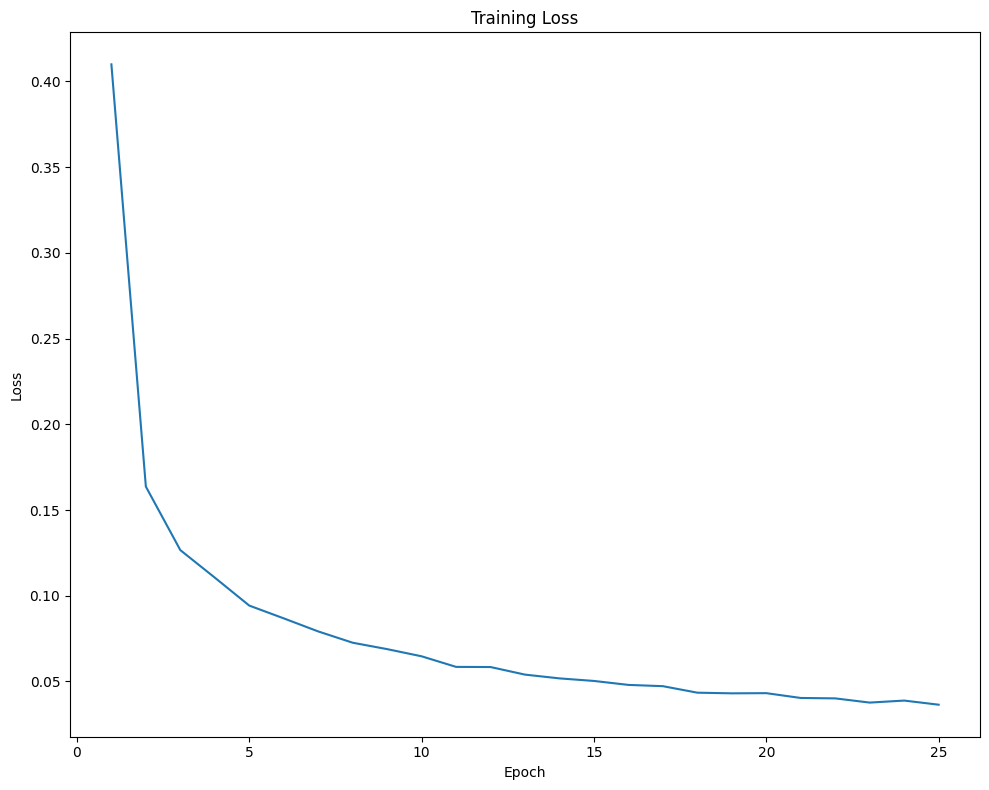

In [49]:
plt.figure(figsize=(10, 8))

plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [50]:
model.eval()
correct_test = 0
total_test = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

accuracy = correct_test / total_test
test_accuracies.append(accuracy)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9817
